##                               World Education - Staff compensation percentage in top 20 countries

There was an article (http://www.huffingtonpost.com/tomostapchuk/mostandleastpaidteachersintheworld_b_8970800.html) about most paid teachers across world. I was
curious to see if I can get that information from world indicators and see if there is a
relation between staff compensation and education expenditure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
%matplotlib inline
from skimage import data
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
os.chdir("Datasets\\WorldStaffCompensation")

### Read World Indicators csv dataset

In [4]:
indicatorsData = pd.read_csv('Indicators.csv')

### Specify education indicators

In [5]:
totalStaffPay = 'SE.XPD.MTOT.ZS'
totalExp = 'SE.XPD.CTOT.ZS'

### Specify top 20 countries of interest copied from the huffingtonpost article

In [6]:
countryData = pd.read_csv('Top20MostPaidTeachersCountries.csv')
lstCountries = countryData['Country'].values.tolist()
lstCountries

['Luxembourg',
 'Korea',
 'Austria',
 'Germany',
 'Canada',
 'Mexico',
 'Ireland',
 'Netherlands',
 'United States',
 'France',
 'Japan',
 'Belgium',
 'Spain',
 'Portugal',
 'Austrailia',
 'Norway',
 'Scotland',
 'Denmark',
 'Israel',
 'Slovenia',
 'United Kingdom',
 'New Zealand',
 'Finland',
 'Italy',
 'Sweden',
 'Chile',
 'Greece',
 'Iceland',
 'Turkey',
 'Colombia',
 'Poland',
 'Czech Republic',
 'Hungary',
 'Slovak Republic',
 'Estonia']

### Define filters for country and education indicators

In [7]:
countryMask = indicatorsData['CountryName'].isin(lstCountries)
staffFilter = indicatorsData['IndicatorCode'].str.contains(totalStaffPay)
expFilter = indicatorsData['IndicatorCode'].str.contains(totalExp)

### Extract staff pay and expenditure data

In [8]:
education_Staff = indicatorsData[countryMask & staffFilter]
education_Exp = indicatorsData[countryMask & expFilter]
print("Staff pay records:", len(education_Staff), " Education expenditure records:", len(education_Exp))

Staff pay records: 361  Education expenditure records: 364


#### Note: There are three missing staff pay records compared to expenditure, but it is fine as we'll be doing a mean of the data 


### Calculate means for Staff compensation vs Expenditure for all years

In [22]:
avgStaffPay = pd.DataFrame({'PayMean':education_Staff.groupby('CountryName')['Value'].mean()})
avgExp = pd.DataFrame({'ExpenditureMean':education_Exp.groupby('CountryName')['Value'].mean()})

### Join records to find fraction of Staff compensation vs Education expenditure.

### Note: As both values are % of total expenditure in public institutions, a ratio between them will give a better picture of staff compensation in the country

In [23]:
total = avgStaffPay.merge(avgExp, on='CountryName', how='inner')
total['PayPercent'] = total['PayMean'].values*100/total['ExpenditureMean'].values
total.reset_index(inplace=True)


### Sort resultant Percent in ascending order

In [28]:
selectedCountries = total.sort_values(by='PayPercent', ascending=True)
selectedCountries

,CountryName,PayMean,ExpenditureMean,PayPercent
5,Czech Republic,53.822424,90.071116,59.755476
7,Estonia,56.551485,87.724800,64.464650
8,Finland,60.336801,92.758562,65.047150
24,Slovak Republic,61.343454,93.647287,65.504786
27,Sweden,63.216013,95.895335,65.921886
22,Poland,63.302799,92.204219,68.654992
3,Chile,63.398382,91.952367,68.946982
2,Canada,68.893984,93.978426,73.308297
12,Hungary,67.279218,91.750567,73.328394
29,United Kingdom,69.148961,92.667564,74.620458


In [29]:
countries = selectedCountries['CountryName'].values.tolist()

### World countries from hufifngton article

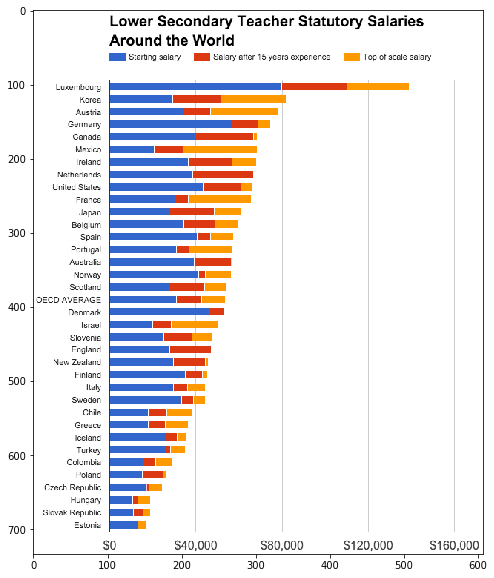

In [19]:
from skimage import data
photo_data = misc.imread('2017_MostPaidTeachers_Countries.jpg')
plt.figure(figsize=(10,10))
plt.imshow(photo_data);

### Plot Staff compensation percentage compared to education expenditure

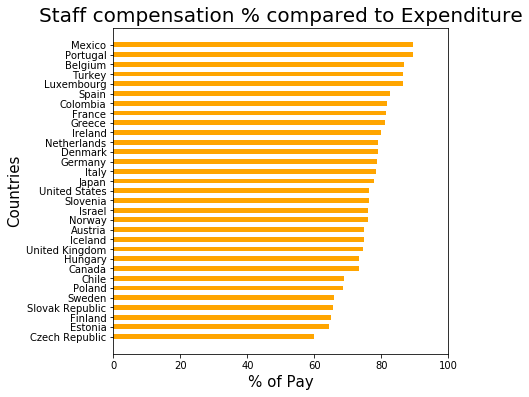

In [37]:
tickLoc = [y for y in range(len(countries))]
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Staff compensation % compared to Expenditure', fontsize=20)
ax.set_xlim([0,100])
plt.yticks(tickLoc, countries)
plt.ylabel('Countries', fontsize=15)
plt.xlabel('% of Pay',fontsize=15)
plt.barh( tickLoc, selectedCountries['PayPercent'].values, height=0.5, color='orange')
plt.show()

### Based on the results, Mexico has  highest teacher compensation whereas Luxembourg, top country mentioned in the article, is in fifth position.

### Find correlation between staff compensation and education expenditure

In [14]:
np.corrcoef(avgExp['ExpMean'].values, avgStaffPay['PayMean'].values)

array([[1.        , 0.30616735],
       [0.30616735, 1.        ]])

### Scatter plot: % of Expenditure vs % of Pay

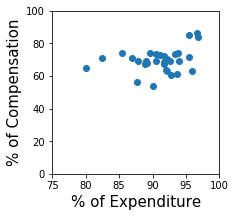

In [32]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_xlim([75,100])
ax.set_ylim([0,100])
plt.xlabel('% of Expenditure', fontsize=15)
plt.ylabel('% of Compensation',fontsize=15)
plt.scatter(avgExp['ExpenditureMean'].values, avgStaffPay['PayMean'].values)
plt.show()

### Based on scatter plot and correlation coefficient of 0.35, looks like Staff compensation doesn't necessarily go up with Education expenditure and of all the 20 countries Mexico's teacher compensation to expenditure ratio is high.